1. INTRODUCCIÓN

Los sideróforos, compuestos orgánicos de bajo peso molecular, desempeñan un papel crucial en la fisiología bacteriana al facilitar la captación de hierro, un micronutriente esencial para el crecimiento y la supervivencia microbiana. Estas moléculas exhiben una notable diversidad estructural, que se refleja en la variabilidad de los grupos funcionales responsables de su capacidad para coordinar y quelar el hierro [1].

Dos de los grupos funcionales más comunes asociados con la capacidad de quelación del hierro en los sideróforos son los hidroxamatos y los catecolatos. Los hidroxamatos, caracterizados por la presencia del grupo funcional hidroxamato (-N(OH)CH2C(O)-), y los catecolatos, que incluyen el grupo catecolato (-OCH2C6H4OH-), han sido ampliamente estudiados debido a su alta afinidad por el hierro y su importancia en la patogenicidad bacteriana [2].

La identificación y clasificación precisa de los sideróforos según la naturaleza de sus grupos quelantes reviste un interés significativo en diversos campos, incluyendo la microbiología, la medicina y la biotecnología. En este contexto, el desarrollo de modelos de clasificación precisos y eficientes se ha convertido en un área de investigación activa [3,4].

En el presente trabajo, se empleó un enfoque de aprendizaje automático basado en Support Vector Machines (SVM) para abordar la tarea de clasificación de sideróforos según la presencia de hidroxamatos o catecolatos en su estructura molecular. Las SVM son conocidas por su capacidad para manejar eficazmente conjuntos de datos de alta dimensionalidad y son ampliamente utilizadas en problemas de clasificación binaria.

El objetivo principal de este trabajo es desarrollar un modelo de clasificación que permita discernir entre sideróforos que contienen hidroxamatos y aquellos que contienen catecolatos, utilizando información estructural de las moléculas.

2. METODOLOGIA

Para llevar a cabo este estudio, se trabajó con dos bases de datos distintas. La primera base de datos contenía información detallada sobre los grupos funcionales presentes en diferentes sideróforos, así como la cantidad de estos grupos funcionales. La segunda base de datos proporcionaba características moleculares específicas de las moléculas de sideróforos.

Preprocesamiento de la primera base de datos: Se extrajo la información completa del DataFrame que contenía los grupos funcionales de los sideróforos. Posteriormente, se separaron las moléculas que presentaban exclusivamente uno de los grupos funcionales (hidroxamato o catecolato), identificando cuál de estos grupos estaba más frecuentemente presente.

Localización de las moléculas con un solo grupo funcional: Se ubicó la posición de todas las moléculas que presentaban únicamente hidroxamato o catecolato.

Preprocesamiento de la segunda base de datos: Se leyó la información de la segunda base de datos que contenía las características moleculares de los sideróforos. Luego, se unieron las columnas correspondientes a hidroxamato y catecolato del primer DataFrame.

Análisis de correlación: Se llevó a cabo un análisis de correlación entre las características moleculares y los grupos funcionales (hidroxamato o catecolato) para determinar qué características estaban más correlacionadas con cada uno de estos grupos.

Preparación de los datos para el entrenamiento y la prueba del modelo: Se seleccionaron las características moleculares con mayor correlación con los grupos funcionales de interés. Posteriormente, se prepararon los conjuntos de datos de entrenamiento y prueba para el modelo de aprendizaje automático, incluyendo únicamente la información relevante de estas características seleccionadas.

Entrenamiento del modelo SVC: Se utilizó un modelo de Support Vector Classifier (SVC) para clasificar las moléculas en función de la presencia de hidroxamatos o catecolatos. El modelo se entrenó utilizando los datos de entrenamiento preparados previamente.

Validación del modelo: Se evaluó el rendimiento del modelo utilizando los datos de prueba y se ajustaron los parámetros según fuera necesario para mejorar su rendimiento.

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [122]:
def filtrar_listas(listas):
    listas_con_un_mayor_a_cero = []
    posiciones = []
    
    for i, lista in enumerate(listas):
        # Verificar si la lista tiene exactamente un número mayor que cero
        if len([num for num in lista if num > 0]) == 1:
            listas_con_un_mayor_a_cero.append(lista)
            posiciones.append(i)
    
    return listas_con_un_mayor_a_cero, posiciones


In [123]:
def contar_por_posicion(y):
    conteo_por_posicion = [0] * 7
    # Recorrer cada lista
    for lista in y:
        # Encontrar la posición del valor mayor a 0
        for i, elemento in enumerate(lista):
            # Si encontramos un valor mayor a 0, incrementamos el contador correspondiente
            if elemento > 0:
                conteo_por_posicion[i] += 1
                break  # Una vez encontrado el valor mayor a 0, podemos salir del bucle
    return conteo_por_posicion


Lectura de datos de primera base de datos para conocer los targets

In [124]:
df0 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv")
df0.head(3)

,ID,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...


Muestra de datos para análisis

In [125]:

print('Cantidad de Filas y columnas:',df0.shape)
print('Nombre columnas:',df0.columns)

Cantidad de Filas y columnas: (221, 14)
Nombre columnas: Index(['ID', 'Compounds', 'Microorganism', 'hydroxamate', 'catecholate',
       'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other',
       'SMILES', 'validate smiles', 'SMARTS', 'SELFIES'],
      dtype='object')


In [126]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    221 non-null    object
 1   Compounds             221 non-null    object
 2   Microorganism         149 non-null    object
 3   hydroxamate           221 non-null    int64 
 4   catecholate           221 non-null    int64 
 5   a-hydroxycarboxylate  221 non-null    int64 
 6   carboxylate           221 non-null    int64 
 7   phenolate             221 non-null    int64 
 8   citrate               221 non-null    int64 
 9   other                 221 non-null    int64 
 10  SMILES                221 non-null    object
 11  validate smiles       221 non-null    bool  
 12  SMARTS                221 non-null    object
 13  SELFIES               221 non-null    object
dtypes: bool(1), int64(7), object(6)
memory usage: 22.8+ KB


Vemos que los int64 presentan misma cantidad de datos no nulos

In [127]:
df0.describe()

,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,1.524887,0.592760,0.104072,0.389140,0.090498,0.099548,0.076923
std,1.409567,0.989372,0.407912,0.627165,0.302940,0.342517,0.267074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000


Diferenciamos los targets

In [128]:
columns_t = ['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']

df0['target'] = df0[columns_t].values.tolist()
targets= df0['target'].tolist()

Se filtran los targets que presetan un solo valor y la posicion de estos

In [150]:
targets_1, pos_1 = filtrar_listas(targets)

Observamos que tanto se repiten los targets

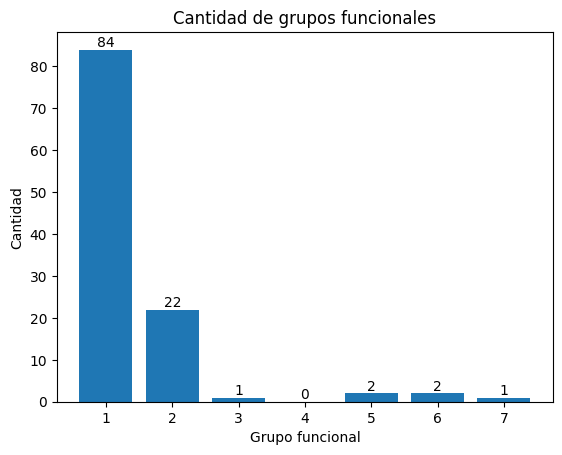

In [151]:
conteo_pos_posicion=contar_por_posicion(targets_1)

# Lista de posiciones
posiciones = list(range(1, 8))

# Crear el gráfico de barras
plt.bar(posiciones, conteo_por_posicion)

# Agregar etiquetas y título
plt.xlabel('Grupo funcional')
plt.ylabel('Cantidad')
plt.title('Cantidad de grupos funcionales')

for i, conteo in enumerate(conteo_por_posicion):
    plt.text(posiciones[i], conteo, str(conteo), ha='center', va='bottom')
    
# Mostrar el gráfico
plt.show()

Donde:
1: Hydroxamate
2: Catecholate
3: a-hydroxycarboxylate
4: Carboxylate
5: Phenolate
6: Citrate
7: Other

Se observa que los targets más comunes son 1: Hydroxamate y 2: Catecholate, por lo que para el uso del modelo CSV se utilizarán solamente estos 2 grupos

Lectura de base de datos 2 para obtener los features a usar

In [131]:
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv")
df1.head()

,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2
3,4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,...,0,1,0,0,1,1,0,1,2,2
4,5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,...,0,0,0,0,0,1,0,1,1,0


In [132]:
print('Cantidad de Filas y columnas:',df1.shape)
print('Nombre columnas:',df1.columns)

Cantidad de Filas y columnas: (221, 119)
Nombre columnas: Index(['ID', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_amide', 'fr_benzene',
       'fr_ester', 'fr_para_hydroxylation', 'fr_phenol',
       'fr_phenol_noOrthoHbond'],
      dtype='object', length=119)


In [133]:
df1.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,14.361458,-5.557024,14.361458,1.244646,0.151045,652.732149,608.708548,652.316484,254.986425,0.304900,...,1.932127,3.443439,0.438914,2.98190,4.665158,0.782805,0.325792,0.588235,1.312217,1.303167
std,1.306650,1.186967,1.306650,0.508051,0.203659,246.818504,229.903744,246.675305,97.555508,0.034790,...,1.344994,2.705670,0.815825,2.83479,2.864534,1.090402,0.727833,0.985184,2.010718,2.012109
min,9.667832,-7.433673,9.667832,0.011382,0.007004,138.122000,130.082000,138.031694,52.000000,0.211046,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.693037,-6.290073,13.693037,1.036932,0.030619,474.551000,436.247000,474.257731,184.000000,0.272302,...,1.000000,2.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.222851,-5.571034,14.222851,1.280840,0.058700,684.788000,632.372000,684.369406,270.000000,0.322843,...,2.000000,3.000000,0.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.424962,-5.211695,15.424962,1.618549,0.158075,800.952000,748.469000,800.464369,314.000000,0.331716,...,3.000000,5.000000,1.000000,6.00000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000
max,16.647474,-0.881916,16.647474,2.220550,0.881757,1198.215000,1126.647000,1197.505065,470.000000,0.371663,...,5.000000,12.000000,3.000000,8.00000,13.000000,4.000000,3.000000,3.000000,6.000000,6.000000


Unimos las columnas correspondientes a Hydroxamate y Catecholate al primer data frame

In [134]:
df0_subset=df0[['hydroxamate', 'catecholate']]
df=pd.concat([df1,df0_subset],axis=1)
df.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,hydroxamate,catecholate
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,14.361458,-5.557024,14.361458,1.244646,0.151045,652.732149,608.708548,652.316484,254.986425,0.304900,...,0.438914,2.98190,4.665158,0.782805,0.325792,0.588235,1.312217,1.303167,1.524887,0.592760
std,1.306650,1.186967,1.306650,0.508051,0.203659,246.818504,229.903744,246.675305,97.555508,0.034790,...,0.815825,2.83479,2.864534,1.090402,0.727833,0.985184,2.010718,2.012109,1.409567,0.989372
min,9.667832,-7.433673,9.667832,0.011382,0.007004,138.122000,130.082000,138.031694,52.000000,0.211046,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.693037,-6.290073,13.693037,1.036932,0.030619,474.551000,436.247000,474.257731,184.000000,0.272302,...,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.222851,-5.571034,14.222851,1.280840,0.058700,684.788000,632.372000,684.369406,270.000000,0.322843,...,0.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,15.424962,-5.211695,15.424962,1.618549,0.158075,800.952000,748.469000,800.464369,314.000000,0.331716,...,1.000000,6.00000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000
max,16.647474,-0.881916,16.647474,2.220550,0.881757,1198.215000,1126.647000,1197.505065,470.000000,0.371663,...,3.000000,8.00000,13.000000,4.000000,3.000000,3.000000,6.000000,6.000000,4.000000,3.000000


Obtenemos información del nuevo df

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 121 entries, ID to catecholate
dtypes: float64(86), int64(34), object(1)
memory usage: 209.0+ KB


Realizamos correclación para obtener los features a utilizar

In [136]:
df_numeric_c = df.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación
corr_c = df_numeric_c.set_index('hydroxamate').corr()
high_corr_values_c = corr_c.where(np.abs(corr_c) > 0.7).stack()

# Filtrar los valores distintos de NaN
high_corr_values_c = high_corr_values_c.dropna()

print("Valores de correlación mayores que 0.7:")
print(high_corr_values_c)

Valores de correlación mayores que 0.7:
MaxEStateIndex  MaxEStateIndex            1.000000
                MinEStateIndex           -0.892189
                MaxAbsEStateIndex         1.000000
                MolWt                     0.841158
                HeavyAtomMolWt            0.842445
                                            ...   
catecholate     fr_benzene                0.886718
                fr_para_hydroxylation     0.853123
                fr_phenol                 0.971309
                fr_phenol_noOrthoHbond    0.971061
                catecholate               1.000000
Length: 3271, dtype: float64


In [137]:
df_numeric_h = df.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación
corr_h = df_numeric_h.set_index('catecholate').corr()
high_corr_values_h = corr_h.where(np.abs(corr_h) > 0.7).stack()

# Filtrar los valores distintos de NaN
high_corr_values_h = high_corr_values_h.dropna()

print("Valores de correlación mayores que 0.7:")
print(high_corr_values_h)

Valores de correlación mayores que 0.7:
MaxEStateIndex  MaxEStateIndex       1.000000
                MinEStateIndex      -0.892189
                MaxAbsEStateIndex    1.000000
                MolWt                0.841158
                HeavyAtomMolWt       0.842445
                                       ...   
hydroxamate     PEOE_VSA8            0.822073
                FractionCSP3         0.719666
                fr_NH0               0.793292
                fr_N_O               0.974994
                hydroxamate          1.000000
Length: 3263, dtype: float64


Del análisis de las correlaciones, elegimos los features a utilizar: fr_benzene, fr_phenol, fr_phenol_noOrthoHbond, PEOE_VSA8, fr_N_O

In [138]:
columns_f = ['fr_benzene', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'PEOE_VSA8', 'fr_N_O']
columns_t = ['hydroxamate', 'catecholate']

df['target'] = df[columns_t].values.tolist()
Y= df0['target'].tolist()

df['features_x'] = df[columns_f].values.tolist()
X= df['features_x'].tolist()

Se seleccionan solo los datos que presentan o Hydroxamate o Catecholate

In [149]:
y, pos_1 = filtrar_listas(Y)


In [140]:
n=0
y_0=[]
y_1=[]
pos_1_0=[]
pos_1_1=[]

while n<len(y):
    if y[n][0]>0:
        y_0.append(y[n])
        pos_1_0.append(pos_1[n])
        n=n+1
    elif y[n][1]>0:
        y_1.append(y[n])
        pos_1_1.append(pos_1[n])
        n=n+1
    else:
        n=n+1

In [141]:
y_total=y_0+y_1*4
pos_total=pos_1_0+pos_1_1*4

In [142]:
x = []

for pos in pos_total:
    x.append(X[pos])

In [143]:
y_final=[]

for element in y_total:
    y_final.append(''.join(map(str, element[:2])))

Se dividen los datos en data de entrenamiento y data de testeo

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y_final, test_size=0.3)

Se crea y entrena el modelo SVC

In [145]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [146]:
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

3. RESULTADOS

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          01       0.00      0.00      0.00         4
          02       0.00      0.00      0.00         9
          03       0.48      1.00      0.65        16
          10       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         3
          30       0.79      1.00      0.88        15
          40       0.00      0.00      0.00         2

    accuracy                           0.60        52
   macro avg       0.18      0.29      0.22        52
weighted avg       0.38      0.60      0.46        52



c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

4. DISCUSIONES

Los resultados obtenidos muestran una precisión general del modelo del 60%, lo que indica una capacidad moderada para clasificar correctamente los sideróforos en función de la presencia de hidroxamatos o catecolatos. Sin embargo, es importante tener en cuenta que el modelo no logra distinguir adecuadamente entre todos los grupos funcionales, como se evidencia en la baja precisión y recuperación para algunas clases.

La clase "03", que representa la presencia de tres catecolatos en las moléculas de sideróforos, muestra un rendimiento notablemente mejor en comparación con otras clases, con una precisión del 48% y un valor de recuperación del 100%. Esto sugiere que el modelo es más efectivo para identificar moléculas con un número específico de catecolatos.

Por otro lado, las clases que representan la presencia de hidroxamatos muestran un rendimiento más variado. Mientras que la clase "30", que indica la presencia de tres hidroxamatos, tiene una precisión del 79% y una recuperación del 100%, otras clases como "01" y "02" muestran un rendimiento muy bajo, con una precisión y recuperación del 0%. Esto indica que el modelo tiene dificultades para distinguir entre moléculas con diferentes cantidades de hidroxamatos, especialmente cuando se trata de una cantidad baja.

5. CONCLUSIONES

En conclusión, el modelo de clasificación basado en SVC proporciona una herramienta inicialmente prometedora para la clasificación de sideróforos según la presencia de hidroxamatos o catecolatos. Sin embargo, se observa la necesidad de mejorar la capacidad del modelo para discriminar entre clases específicas, especialmente aquellas con menor representación en el conjunto de datos.

Se sugiere que futuros trabajos se centren en la optimización del modelo mediante la selección de características más relevantes, el ajuste de parámetros del modelo y la expansión del conjunto de datos de entrenamiento para mejorar su capacidad de generalización. Además, sería beneficioso explorar otras técnicas de aprendizaje automático y considerar la inclusión de características adicionales que puedan mejorar la capacidad del modelo para distinguir entre diferentes grupos funcionales de sideróforos.

6. BIBLIOGRAFIA


- [1] Miethke, M., y Marahiel, M. A. (2007). Siderophore-based iron acquisition and pathogen control. Microbiology and Molecular Biology Reviews, 71(3), 413–451.
- [2] Challis, G. L. (2005). A widely distributed bacterial pathway for siderophore biosynthesis independent of nonribosomal peptide synthetases. Chembiochem, 6(4), 601–611.
- [3] Neilands, J. B. (1995). Siderophores: structure and function of microbial iron transport compounds. Journal of Biological Chemistry, 270(45), 26723–26726.
- [4] Crosa, J. H. (1989). Genetics and molecular biology of siderophore-mediated iron transport in bacteria. Microbiological Reviews, 53(4), 517–530.